In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
train_data_dir =     '/content/drive/MyDrive/Breast_cancer_dataset/FNA'
test_data_dir =      '/content/drive/MyDrive/Breast_cancer_dataset/test'

In [18]:
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # Assuming color images (RGB)
img_size=(img_width, img_height)
batch_size = 32
epochs = 50

In [5]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification (benign or malignant)
    subset='training'
)

Found 1380 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 344 images belonging to 2 classes.


In [8]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
43/43 [==============================] - 653s 15s/step - loss: 0.4832 - accuracy: 0.8494 - val_loss: 1.1688 - val_accuracy: 0.5375
Epoch 2/50
43/43 [==============================] - 56s 1s/step - loss: 0.3012 - accuracy: 0.8924 - val_loss: 0.6980 - val_accuracy: 0.6594
Epoch 3/50
43/43 [==============================] - 55s 1s/step - loss: 0.2984 - accuracy: 0.8917 - val_loss: 0.5528 - val_accuracy: 0.8156
Epoch 4/50
43/43 [==============================] - 58s 1s/step - loss: 0.2539 - accuracy: 0.9088 - val_loss: 0.5764 - val_accuracy: 0.7125
Epoch 5/50
43/43 [==============================] - 59s 1s/step - loss: 0.2741 - accuracy: 0.8984 - val_loss: 0.5445 - val_accuracy: 0.7719
Epoch 6/50
43/43 [==============================] - 65s 2s/step - loss: 0.2526 - accuracy: 0.9172 - val_loss: 0.7561 - val_accuracy: 0.6781
Epoch 7/50
43/43 [==============================] - 56s 1s/step - loss: 0.2236 - accuracy: 0.9184 - val_loss: 0.5744 - val_accuracy: 0.7312
Epoch 8/50
43/43 [

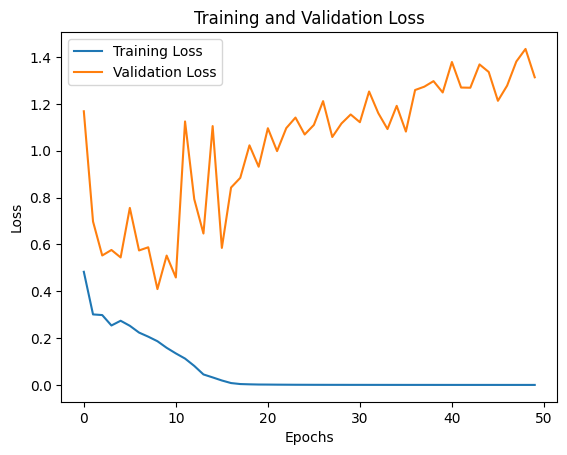

In [11]:
# Plot training and validation loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

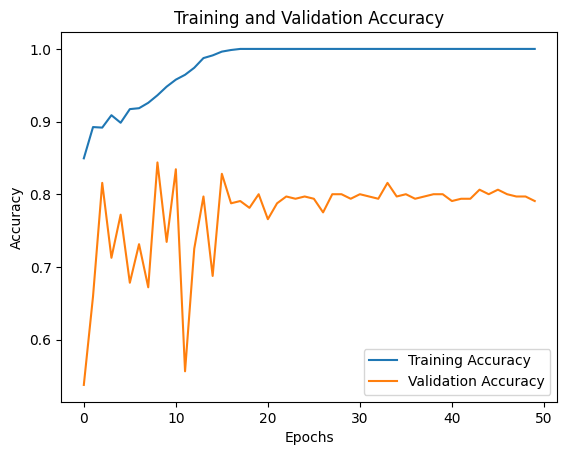

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [13]:
import pandas as pd
test_df = pd.DataFrame({
    test_data_dir
})
samples = test_df.shape[0]

In [19]:
test_filenames = os.listdir('/content/drive/MyDrive/Breast_cancer_dataset/__MACOSX')
test_df = pd.DataFrame({'filename': os.listdir(test_data_dir)})
samples = test_df.shape[0]

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_data_dir,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 14 validated image filenames.


In [21]:
if test_generator.n > 0:
    # Predictions
    predictions = model.predict(test_generator, steps=np.ceil(test_generator.n/batch_size))

    # Assuming predictions close to 0 are benign and close to 1 are malignant
    predicted_labels = np.round(predictions)

    # Print the predicted labels
    print(predicted_labels)
else:
    print("No valid images for predictions.")

1/1 [==============================] - 0s 467ms/step
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
